In [1]:
pip install keras


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow


In [3]:
from tensorflow import keras


In [6]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
#from keras.utils import np_utils
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.utils import shuffle

In [12]:
# Read the data...
data = pd.read_csv(r"C:\Users\JUHI GAJJAR\Downloads\6th sem Project\archive\A_Z Handwritten Data.csv").astype('float32')

In [13]:

# Split data the X - Our data , and y - the prdict label
X = data.drop('0',axis = 1)
y = data['0']

In [14]:

# Reshaping the data in csv file so that it can be displayed as an image...

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))


In [15]:

print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


In [16]:
# Dictionary for getting characters from index values...
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

C:\Users\JUHI GAJJAR\AppData\Local\Temp\ipykernel_4976\2790173049.py:3: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  train_yint = np.int0(y)


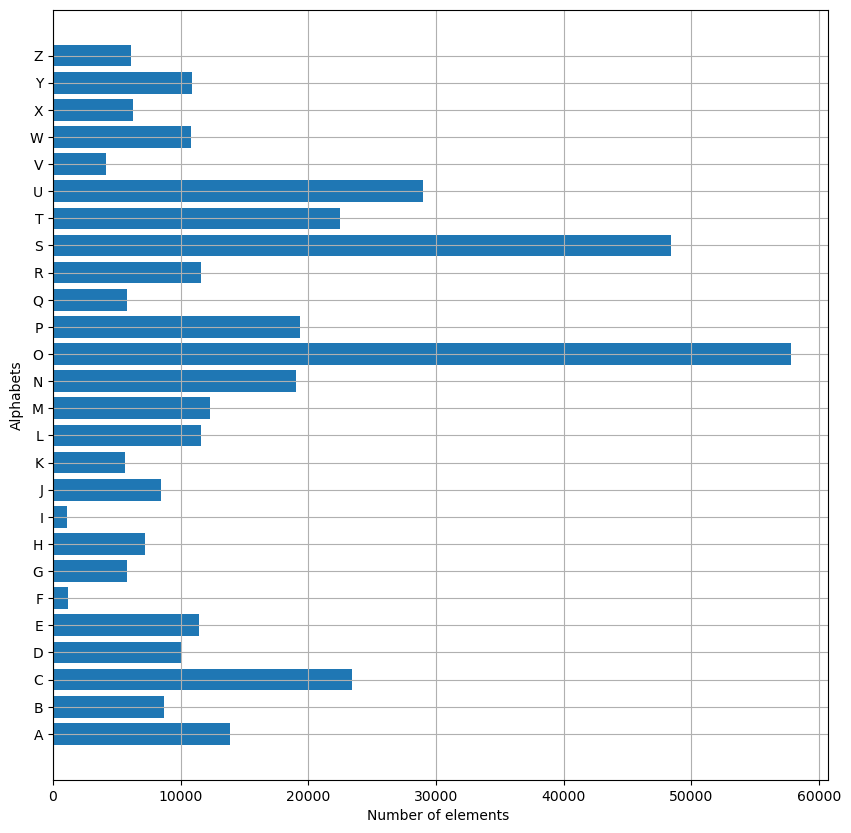

In [17]:
# Plotting the number of alphabets in the dataset...

train_yint = np.int0(y)
count = np.zeros(26, dtype='int')
for i in train_yint:
    count[i] +=1

alphabets = []
for i in word_dict.values():
    alphabets.append(i)

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)

plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()


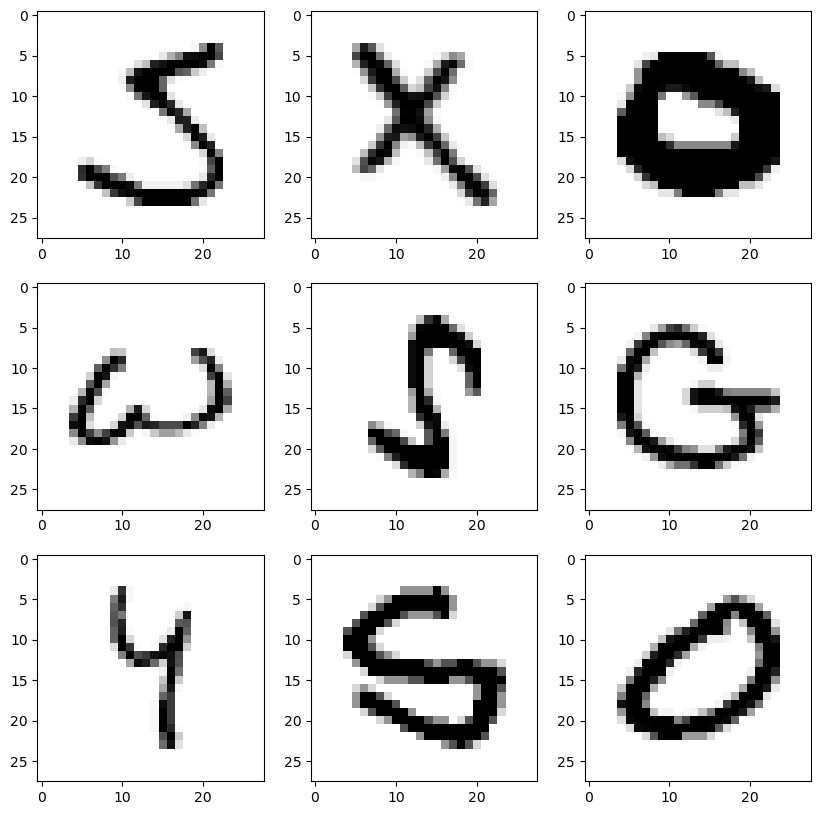

In [18]:
#Shuffling the data ...
shuff = shuffle(train_x[:100])

fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()

for i in range(9):
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()


In [19]:
#Reshaping the training & test dataset so that it can be put in the model...

train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of train data: ", test_X.shape)

New shape of train data:  (297960, 28, 28, 1)
New shape of train data:  (74490, 28, 28, 1)


In [20]:
# Converting the labels to categorical values...

train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)

test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


In [21]:
# CNN model...

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(26,activation ="softmax"))


In [22]:

model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')



In [23]:
history = model.fit(train_X, train_yOHE, epochs=1, callbacks=[reduce_lr, early_stop],  validation_data = (test_X,test_yOHE))





9312/9312 [==============================] - 207s 22ms/step - loss: 0.1522 - accuracy: 0.9582 - val_loss: 0.0803 - val_accuracy: 0.9778 - lr: 0.0010


In [24]:
model.summary()
model.save(r'model_hand.h5')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

C:\Users\JUHI GAJJAR\anaconda\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
# Displaying the accuracies & losses for train & validation set...

print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.9778225421905518]
The training accuracy is : [0.9581587910652161]
The validation loss is : [0.08028311282396317]
The training loss is : [0.1522376388311386]


In [26]:
#Making model predictions...

pred = model.predict(test_X[:9])
print(test_X.shape)

1/1 [==============================] - 0s 409ms/step
(74490, 28, 28, 1)


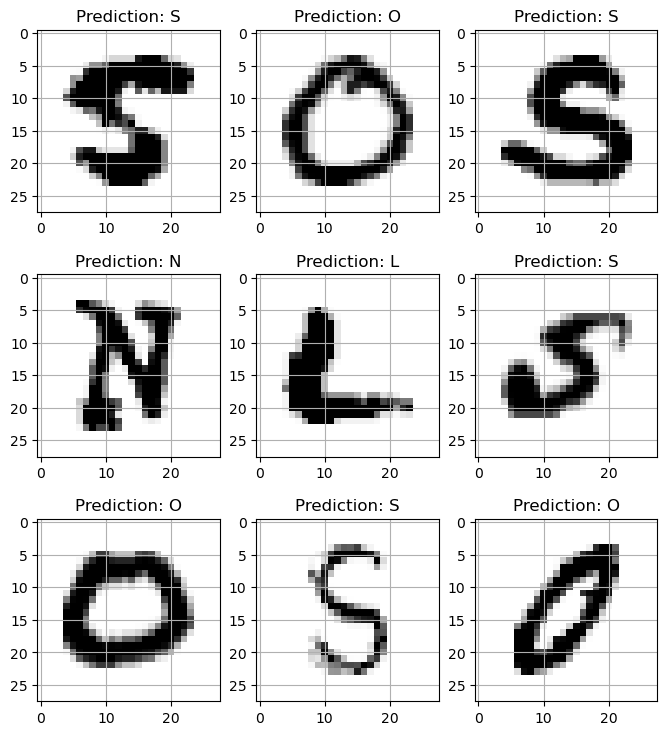

In [27]:
# Displaying some of the test images & their predicted labels...

fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()


In [31]:
pip install opencv-python


  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   -----

   --------------------------------- ------ 32.5/38.6 MB 344.2 kB/s eta 0:00:18
   --------------------------------- ------ 32.5/38.6 MB 342.2 kB/s eta 0:00:18
   --------------------------------- ------ 32.6/38.6 MB 344.2 kB/s eta 0:00:18
   --------------------------------- ------ 32.6/38.6 MB 344.2 kB/s eta 0:00:18
   --------------------------------- ------ 32.6/38.6 MB 344.2 kB/s eta 0:00:18
   --------------------------------- ------ 32.6/38.6 MB 344.2 kB/s eta 0:00:18
   --------------------------------- ------ 32.6/38.6 MB 345.3 kB/s eta 0:00:18
   --------------------------------- ------ 32.7/38.6 MB 345.3 kB/s eta 0:00:18
   --------------------------------- ------ 32.7/38.6 MB 347.0 kB/s eta 0:00:18
   --------------------------------- ------ 32.7/38.6 MB 347.0 kB/s eta 0:00:18
   --------------------------------- ------ 32.7/38.6 MB 347.0 kB/s eta 0:00:18
   --------------------------------- ------ 32.7/38.6 MB 347.0 kB/s eta 0:00:18
   --------------------------------- ---

In [35]:
import cv2

In [ ]:
# Prediction on external image...

img = cv2.imread(r'C:\Users\JUHI GAJJAR\Downloads\T.png')
img_copy = img.copy()

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))

img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,1))


img_pred = word_dict[np.argmax(model.predict(img_final))]

cv2.putText(img, "Dataflair _ _ _ ", (20,25), cv2.FONT_HERSHEY_TRIPLEX, 0.7, color = (0,0,230))
cv2.putText(img, "Prediction: " + img_pred, (20,410), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (255,0,30))
cv2.imshow('Dataflair handwritten character recognition _ _ _ ', img)


while (1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()



1/1 [==============================] - 0s 265ms/step


In [45]:
# # Assuming you have loaded the model and defined the dictionary somewhere in your code
# model = 'model_hand.h5'  # Load or define your model
# # Dictionary for getting characters from index values...
# word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

# img = cv2.imread(r'C:\Users\JUHI GAJJAR\OneDrive\Desktop\th.jpg')
# img_copy = img.copy()

# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img = cv2.resize(img, (400, 440))

# img_copy = cv2.GaussianBlur(img_copy, (7, 7), 0)
# img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
# _, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

# # Find contours in the image
# contours, _ = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Iterate over contours
# for contour in contours:
#     # Get bounding box for each contour
#     x, y, w, h = cv2.boundingRect(contour)
    
#     # Extract the region of interest (ROI) from the image
#     roi = img_thresh[y:y + h, x:x + w]
    
#     # Resize the ROI to the input size expected by the model
#     roi = cv2.resize(roi, (28, 28))
#     roi = np.reshape(roi, (1, 28, 28, 1))
    
#     # Make prediction for the character in the current ROI
#     char_pred = word_dict[np.argmax(model.predict(roi))]
    
#     # Draw bounding box and predicted character on the original image
#     cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
#     cv2.putText(img, char_pred, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# cv2.imshow('Dataflair handwritten character recognition _ _ _ ', img)

# while True:
#     k = cv2.waitKey(1) & 0xFF
#     if k == 27:
#         break

# cv2.destroyAllWindows()


AttributeError: 'str' object has no attribute 'predict'

In [47]:
# # Assuming you have loaded the model and defined the dictionary somewhere in your code
# model = 'model_hand.h5'  # Load or define your model
# word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}

# img = cv2.imread(r'C:\Users\JUHI GAJJAR\OneDrive\Desktop\th.jpg')
# img_copy = img.copy()

# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img = cv2.resize(img, (400, 440))

# img_copy = cv2.GaussianBlur(img_copy, (7, 7), 0)
# img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
# _, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

# # Find contours in the image
# contours, _ = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Iterate over contours
# for contour in contours:
#     # Get bounding box for each contour
#     x, y, w, h = cv2.boundingRect(contour)
    
#     # Extract the region of interest (ROI) from the image
#     roi = img_thresh[y:y + h, x:x + w]
    
#     # Resize the ROI to the input size expected by the model
#     roi = cv2.resize(roi, (28, 28))
#     roi = np.reshape(roi, (1, 28, 28, 1))
    
#     # Make prediction for the character in the current ROI
#     char_pred = word_dict[np.argmax(model.predict(roi))]
    
#     # Draw bounding box and predicted character on the original image
#     cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
#     cv2.putText(img, char_pred, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# cv2.imshow('Handwritten Character Recognition', img)

# while True:
#     k = cv2.waitKey(1) & 0xFF
#     if k == 27:
#         break

# cv2.destroyAllWindows()


In [53]:
# import cv2
# import numpy as np
# from tensorflow.keras.models import load_model

# # Assuming you have loaded the model and defined the dictionary somewhere in your code
# model = load_model('model_hand.h5')  # Replace 'your_model_path' with the actual path to your model file
# word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}

# img = cv2.imread(r'C:\Users\JUHI GAJJAR\OneDrive\Desktop\th.jpg')
# img_copy = img.copy()

# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img = cv2.resize(img, (400, 440))

# img_copy = cv2.GaussianBlur(img_copy, (7, 7), 0)
# img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)

# # Perform additional preprocessing (you may need to adjust these steps)
# img_gray = cv2.medianBlur(img_gray, 5)
# img_thresh = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# # Find contours in the image
# contours, _ = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Iterate over contours
# for contour in contours:
#     # Get bounding box for each contour
#     x, y, w, h = cv2.boundingRect(contour)
    
#     # Extract the region of interest (ROI) from the image
#     roi = img_thresh[y:y + h, x:x + w]
    
#     # Resize the ROI to the input size expected by the model
#     roi = cv2.resize(roi, (28, 28))
#     roi = np.reshape(roi, (1, 28, 28, 1))
    
#     # Make prediction for the character in the current ROI
#     char_pred = word_dict[np.argmax(model.predict(roi))]
    
#     # Draw bounding box and predicted character on the original image
#     cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
#     cv2.putText(img, char_pred, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# cv2.imshow('Handwritten Character Recognition', img)

# while True:
#     k = cv2.waitKey(1) & 0xFF
#     if k == 27:
#         break

# cv2.destroyAllWindows()


1/1 [==============================] - 0s 305ms/step


KeyboardInterrupt: 